In [1]:
# part 1 & 2 pls refer to loan1.ipynb, loan2.ipynb
# part 3

import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.utils.multiclass import type_of_target
from scipy import stats

In [2]:
# import train and test subset
train=pd.read_csv('loantrain.csv')
test=pd.read_csv('loantest.csv')

In [3]:
# train.info()

In [4]:
# drop cust_id
train=train.drop('custid',axis=1)
test=test.drop('custid',axis=1)

In [5]:
# fill missing value which 0 to get a complete subset
# then try to drop data which observations have many NaN in some columns
train = train.replace(np.nan, 0)
test = test.replace(np.nan, 0)

In [7]:
train1 = train[np.isfinite(train['apply_score'])]
test1 = test[np.isfinite(test['apply_score'])]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3128 entries, 0 to 3327
Data columns (total 81 columns):
custid                                        3128 non-null int64
low_volume_percent                            3127 non-null float64
middle_volume_percent                         3127 non-null float64
take_amount_in_later_12_month_highest         3128 non-null int64
trans_amount_increase_rate_lately             3126 non-null float64
trans_activity_month                          3127 non-null float64
trans_activity_day                            3127 non-null float64
transd_mcc                                    3127 non-null float64
trans_days_interval_filter                    3124 non-null float64
trans_days_interval                           3127 non-null float64
regional_mobility                             3127 non-null float64
repayment_capability                          3128 non-null int64
is_high_user                                  3128 non-null int64
number_of_trans_f

In [10]:
train2 = train[np.isfinite(train['loans_score'])]
test2 = test[np.isfinite(test['loans_score'])]

In [13]:
train1 = train1.replace(np.nan, 0)
test1 = test1.replace(np.nan, 0)

In [14]:
train2 = train2.replace(np.nan, 0)
test2 = test2.replace(np.nan, 0)

In [15]:
# Needed to run the logistic regression
import statsmodels.formula.api as smf

# For plotting/checking assumptions
import seaborn as sns

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3328 entries, 0 to 3327
Data columns (total 80 columns):
low_volume_percent                            3328 non-null float64
middle_volume_percent                         3328 non-null float64
take_amount_in_later_12_month_highest         3328 non-null int64
trans_amount_increase_rate_lately             3328 non-null float64
trans_activity_month                          3328 non-null float64
trans_activity_day                            3328 non-null float64
transd_mcc                                    3328 non-null float64
trans_days_interval_filter                    3328 non-null float64
trans_days_interval                           3328 non-null float64
regional_mobility                             3328 non-null float64
repayment_capability                          3328 non-null int64
is_high_user                                  3328 non-null int64
number_of_trans_from_2011                     3328 non-null float64
historical_tran

In [16]:
# the correlation
train.corr()

,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,transd_mcc,trans_days_interval_filter,trans_days_interval,regional_mobility,...,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day,location
low_volume_percent,1.000000,-0.152208,-0.067023,0.007396,0.027955,-0.101483,-0.100264,0.057630,0.078431,-0.042163,...,-0.091393,-0.072193,-0.014454,-0.060415,-0.053940,-0.090246,-0.080201,0.078600,0.055823,0.101443
middle_volume_percent,-0.152208,1.000000,-0.134924,0.006768,-0.024858,-0.055235,-0.102654,0.013598,0.011399,0.015081,...,-0.106624,-0.155394,-0.013107,-0.017568,-0.025106,-0.176976,-0.177826,0.003657,0.003268,-0.151301
take_amount_in_later_12_month_highest,-0.067023,-0.134924,1.000000,-0.008600,0.069674,0.109653,0.190885,-0.056141,-0.058235,0.015470,...,0.053087,0.050173,0.036421,0.047346,0.046208,0.064600,0.049836,0.022816,-0.004222,0.050491
trans_amount_increase_rate_lately,0.007396,0.006768,-0.008600,1.000000,0.016587,-0.003846,-0.013801,0.014666,0.001245,-0.032566,...,0.002759,0.034690,0.008094,-0.018384,-0.018281,0.011338,0.048122,-0.006683,0.030097,-0.009982
trans_activity_month,0.027955,-0.024858,0.069674,0.016587,1.000000,0.058819,0.073031,-0.086633,-0.155543,-0.210416,...,0.035483,-0.034827,0.001084,0.005727,0.007012,-0.032990,-0.045890,-0.029758,-0.014278,0.033884
trans_activity_day,-0.101483,-0.055235,0.109653,-0.003846,0.058819,1.000000,0.679563,-0.494402,-0.538203,0.134858,...,0.195830,0.114979,0.163459,0.539182,0.538140,0.244644,0.100666,-0.176250,-0.268138,-0.035102
transd_mcc,-0.100264,-0.102654,0.190885,-0.013801,0.073031,0.679563,1.000000,-0.417493,-0.446712,0.122589,...,0.169196,0.076371,0.118867,0.363391,0.368628,0.171028,0.064113,-0.104157,-0.186584,-0.118622
trans_days_interval_filter,0.057630,0.013598,-0.056141,0.014666,-0.086633,-0.494402,-0.417493,1.000000,0.693371,-0.126406,...,-0.109625,-0.041869,-0.099845,-0.281371,-0.280845,-0.107962,-0.029303,0.073534,0.164026,0.187230
trans_days_interval,0.078431,0.011399,-0.058235,0.001245,-0.155543,-0.538203,-0.446712,0.693371,1.000000,-0.125654,...,-0.147819,-0.023428,-0.082076,-0.272176,-0.272802,-0.096619,-0.012046,0.087416,0.160773,0.084345
regional_mobility,-0.042163,0.015081,0.015470,-0.032566,-0.210416,0.134858,0.122589,-0.126406,-0.125654,1.000000,...,0.039735,0.089318,0.037052,0.127747,0.125157,0.096167,0.078814,-0.049291,-0.092641,-0.069612


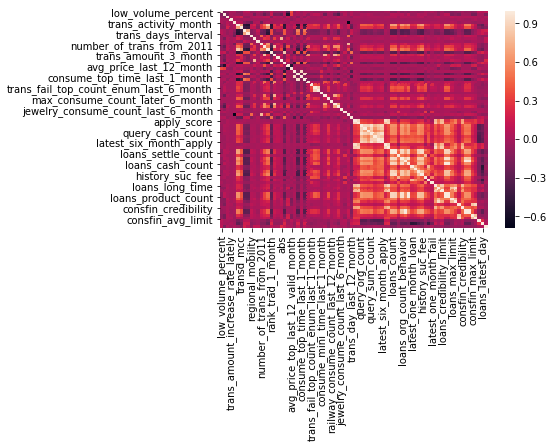

In [19]:
sns.heatmap(train.corr())
plt.show()

In [23]:
train.columns.get_loc("status")

37

In [8]:
# logistic regression to fit a model
# the dependent variable is status and independent variables are the remaining variables
# model1= smf.logit(formula="status~ .", data= train).fit()
# model1.summary()
Xtrain = train.drop('status',axis=1)
ytrain = train['status']
Xtest = test.drop('status',axis=1)
ytest = test['status']

In [37]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(Xtrain,ytrain)
y_pred = logmodel.predict(Xtest)

ValueError: X has 79 features per sample; expecting 9

In [34]:
# implementing the model
import statsmodels.api as sm
logit_model=sm.Logit(ytrain,Xtrain)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.439451
         Iterations 28
                           Logit Regression Results                           
Dep. Variable:                 status   No. Observations:                 3328
Model:                          Logit   Df Residuals:                     3252
Method:                           MLE   Df Model:                           75
Date:                Wed, 15 May 2019   Pseudo R-squ.:                  0.2153
Time:                        18:38:57   Log-Likelihood:                -1462.5
converged:                       True   LL-Null:                       -1863.7
                                        LLR p-value:                2.888e-122
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
low_volume_percent                         

/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:1092: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [35]:
# The p-values for most of the variables are greater than 0.05, except several variables
# therefore, we will remove them.
cols=['take_amount_in_later_12_month_highest','trans_fail_top_count_enum_last_1_month','pawns_auctions_trusts_consume_last_6_month','loans_count','loans_settle_count','loans_overdue_count','latest_one_month_suc','latest_one_month_fail','latest_query_day'] 
Xtrain=Xtrain[cols]
# the reduced model
logit_model2=sm.Logit(ytrain,Xtrain)
result2=logit_model2.fit()
print(result2.summary())

Optimization terminated successfully.
         Current function value: 0.509200
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 status   No. Observations:                 3328
Model:                          Logit   Df Residuals:                     3319
Method:                           MLE   Df Model:                            8
Date:                Wed, 15 May 2019   Pseudo R-squ.:                 0.09074
Time:                        18:48:34   Log-Likelihood:                -1694.6
converged:                       True   LL-Null:                       -1863.7
                                        LLR p-value:                 2.969e-68
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
take_amount_in_later_12_month_highest      -

In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(ytest, y_pred)
confusion_matrix

array([[1021,   37],
       [ 283,   85]])

In [36]:
print('Accuracy of full logistic regression classifier on test set: {:.2f}'.format(logmodel.score(Xtest, ytest)))
# the accuracy is slightly lower than 0.8

Accuracy of full logistic regression classifier on test set: 0.78


In [33]:
from sklearn.metrics import classification_report
print(classification_report(ytest, y_pred))

             precision    recall  f1-score   support

          0       0.78      0.97      0.86      1058
          1       0.70      0.23      0.35       368

avg / total       0.76      0.78      0.73      1426



In [41]:
# apply the reduced model
model= smf.logit(formula="status~ take_amount_in_later_12_month_highest + trans_fail_top_count_enum_last_1_month + pawns_auctions_trusts_consume_last_6_month+ loans_count + loans_settle_count + loans_overdue_count + latest_one_month_suc + latest_one_month_fail + latest_query_day", data= train).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.457350
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 status   No. Observations:                 3328
Model:                          Logit   Df Residuals:                     3318
Method:                           MLE   Df Model:                            9
Date:                Wed, 15 May 2019   Pseudo R-squ.:                  0.1833
Time:                        19:00:58   Log-Likelihood:                -1522.1
converged:                       True   LL-Null:                       -1863.7
                                        LLR p-value:                2.663e-141
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                     -1.6277      0.092    -17.605      0.000      -1.809      -1.446
take_amount_in_later_12_month_highest       2.077e-05   1.21e-05      1.717      0.086   -2.94e-06    4.45e-05
trans_fail_top_count_enum_last_1_month         0.3422      0.027     12.621      0.000       0.289       0.395
pawns_auctions_trusts_consume_last_6_month -8.581e-06   2.28e-06     -3.764      0.000    -1.3e-05   -4.11e-06
loans_count                                    0.0404      0.012      3.358      0.001       0.017       0.064
loans_settle_count                            -0.0591      0.013     -4.536      0.000      -0.085      -0.034
loans_overdue_count                            0.1314      0.021      6.334      0.000       0.091       0.172
latest_one_month_suc                          -0.2244      0.035     -6.472      0.000      -0.292      -0.156
latest_one_month_fail                          0.1512      0.021      7.218      0.000       0.110       0.192
latest_query_day                               0.0026      0.001      2.398      0.016       0.000       0.005
==============================================================================================================
"""

In [42]:
ypred = model.predict(Xtest)

In [59]:
# converting predicted values into classes using threshold
threshold=0.5

predicted_class1=np.zeros(ypred.shape)
predicted_class1[ypred>threshold]=1
predicted_class1

array([0., 0., 0., ..., 0., 0., 0.])

In [60]:
# Confusion matrix, Accuracy, sensitivity and specificity
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test[['status']],predicted_class1)
print('Confusion Matrix : \n', cm)

total=sum(sum(cm))
# from confusion matrix calculate accuracy
accuracy=(cm[0,0]+cm[1,1])/total
print ('The threshold is 0.5')
print ('Accuracy : ', accuracy)

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

# the reduced model has higher accuracy closer to 0.8

Confusion Matrix : 
 [[1009   49]
 [ 241  127]]
The threshold is 0.5
Accuracy :  0.7966339410939691
Sensitivity :  0.9536862003780718
Specificity :  0.3451086956521739


In [65]:
# if we change the threshold:
threshold=0.7

predicted_class1=np.zeros(ypred.shape)
predicted_class1[ypred>threshold]=1
predicted_class1

array([0., 0., 0., ..., 0., 0., 0.])

In [66]:
# Confusion matrix, Accuracy, sensitivity and specificity again
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test[['status']],predicted_class1)
print('Confusion Matrix : \n', cm)

total=sum(sum(cm))
# from confusion matrix calculate accuracy
accuracy=(cm[0,0]+cm[1,1])/total
print ('The threshold is 0.7')
print ('Accuracy : ', accuracy)

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

# the accuracy is decreased 

Confusion Matrix : 
 [[1039   19]
 [ 290   78]]
The threshold is 0.7
Accuracy :  0.7833099579242637
Sensitivity :  0.9820415879017014
Specificity :  0.21195652173913043


In [6]:
# SVM
from sklearn import svm

In [7]:
svm_linear = svm.SVC(C = 0.01, kernel = 'linear', probability=True)
svm_poly =  svm.SVC(C = 0.01, kernel = 'poly', probability=True)
svm_rbf =  svm.SVC(gamma = 0.01, C =0.01 , probability=True)
svm_sigmoid =  svm.SVC(C = 0.01, kernel = 'sigmoid',probability=True)

In [ ]:
svm_linear.fit(Xtrain, ytrain.values)

In [16]:
# X (predictor) and Y (target) for training data set and x_test(predictor) of test_dataset
# create SVM classification object 
# model = svm.SVC(kernel='linear', C=1, gamma=1) 
# there is various option associated with it, like changing kernel, gamma and C value. Will discuss more # about it in next section.Train the model using the training sets and check score

In [ ]:
# model.fit(Xtrain, ytrain)
 svm_linear.score(Xtrain, ytrain)

In [ ]:
svm_poly.fit(Xtrain, ytrain.values)

In [ ]:
svm_poly.score(Xtrain, ytrain)

In [ ]:
vm_rbf.fit(Xtrain, ytrain.values)

In [ ]:
svm_rbf.score(Xtrain, ytrain)

In [ ]:
#Predict Output
predicted= model.predict(Xtest)

In [ ]:
# runnning SVM no output, it should be revised later

In [7]:
# boosting method
from xgboost import XGBClassifier

In [8]:
# fit model no training data
model = XGBClassifier()
model.fit(Xtrain, ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [10]:
import xgboost as xgb

data_train = xgb.DMatrix(Xtrain, ytrain)  
data_test = xgb.DMatrix(Xtest, ytest)
 
param = {'max_depth': 5, 'eta': 1, 'objective': 'binary:logistic'}
watchlist = [(data_test, 'test'), (data_train, 'train')]
n_round = 3
booster = xgb.train(param, data_train, num_boost_round=n_round, evals=watchlist)

[23:12:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=5
[0]	test-error:0.235624	train-error:0.182993
[23:12:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[1]	test-error:0.239832	train-error:0.172476
[23:12:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[2]	test-error:0.240533	train-error:0.149038


In [11]:
# calculate the accuracy
y_predicted = booster.predict(data_test)
y = data_test.get_label()
 
accuracy = sum(y == (y_predicted > 0.5))
accuracy_rate = float(accuracy) / len(y_predicted)
print ('Sample numner：{0}'.format(len(y_predicted)))
print ('Number of correct prediction：{0}'.format(accuracy) )
print ('Accuracy：{0:.3f}'.format((accuracy_rate)))
# the accuracy is approximately 0.76
# the tunning process is needed later

Sample numner：1426
Number of correct prediction：1083
Accuracy：0.759


In [12]:
# xgboost by sklearn
model = xgb.XGBClassifier(max_depth=3, n_estimators=200, learn_rate=0.01)
model.fit(Xtrain, ytrain)  
test_score = model.score(Xtest, ytest)
print('test_score: {0}'.format(test_score))

test_score: 0.7917251051893408


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

model_lr = LogisticRegression()
model_rf = RandomForestClassifier(n_estimators=200)
model_xgb = xgb.XGBClassifier(max_depth=5, n_estimators=200, learn_rate=0.01)
models = [model_lr, model_rf, model_xgb]
model_name = ['LogisticRegression', 'Random Forest', 'XGBoost']
 

for i in range(3):
    print(model_name[i] + ":")
    model = models[i]
    model.fit(Xtrain, ytrain)
    train_score = model.score(Xtrain, ytrain)
    test_score = model.score(Xtest, ytest)
    print('train score: {0:.5f} \t test score: {0:.5f}'.format(train_score, test_score))

LogisticRegression:
train score: 0.78335 	 test score: 0.78335
Random Forest:
train score: 1.00000 	 test score: 1.00000
XGBoost:
train score: 0.99129 	 test score: 0.99129


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
